In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import os
import sys
from bootstrap_function import perform_bootstrap
from scipy.stats import ks_2samp
%matplotlib inline

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

sns.set_theme()
sns.set_context("talk")

In [3]:
df = pd.read_csv('../master_df_3.csv')
df = df.drop(df.columns[0], axis=1)
df

IMAGE_SERIES      Label  TRACK_ID  NUMBER_SPOTS  NUMBER_GAPS  \
0      PRF5_B3_pickup    Track_0         0            12            0   
1      PRF5_B3_pickup    Track_1         1            10            0   
2      PRF5_B3_pickup    Track_2         2             3            0   
3      PRF5_B3_pickup    Track_3         3             7            0   
4      PRF5_B3_pickup    Track_4         4             3            0   
...               ...        ...       ...           ...          ...   
28951  JHH4 C2 Pickup  Track_562       171            28            1   
28952  JHH4 C2 Pickup  Track_563       172            24            1   
28953  JHH4 C2 Pickup  Track_571       180            17            0   
28954  JHH4 C2 Pickup  Track_578       187             7            0   
28955  JHH4 C2 Pickup  Track_582       191             3            0   

       LONGEST_GAP  NUMBER_SPLITS  NUMBER_MERGES  NUMBER_COMPLEX  \
0                0              0              0               0   
1                0              0              0               0   
2                0              0              0               0   
3                0              0              0               0   
4                0              0              0               0   
...            ...            ...            ...             ...   
28951            2              0              0               0   
28952            2              0              0               0   
28953            0              0              0               0   
28954            0              0              0               0   
28955            0              0              0               0   

       TRACK_DURATION  ...  TRACK_MAX_SPEED  TRACK_MIN_SPEED  \
0                  11  ...           29.000            1.000   
1                   9  ...            2.000            0.000   
2                   2  ...            4.000            2.000   
3                   6  ...           12.837            2.459   
4                   2  ...           15.758            7.837   
...               ...  ...              ...              ...   
28951              29  ...           12.144            1.261   
28952              25  ...           26.095            0.513   
28953              16  ...           39.380            0.910   
28954               6  ...           32.209            8.133   
28955               2  ...           25.750           15.512   

       TRACK_MEDIAN_SPEED  TRACK_STD_SPEED  TRACK_MEAN_QUALITY  \
0                  10.000            9.781               0.093   
1                   1.000            0.928               0.087   
2                   4.000            1.414               0.067   
3                   6.725            3.562               0.096   
4                  15.758            5.601               0.075   
...                   ...              ...                 ...   
28951               3.776            2.951              20.357   
28952               6.390            7.976              11.447   
28953              10.010            9.622              13.101   
28954              15.220            9.544               1.150   
28955              25.750            7.239              10.524   

       TRACK_MAX_QUALITY  TRACK_MIN_QUALITY  TRACK_MEDIAN_QUALITY  \
0                  0.123              0.059                 0.100   
1                  0.116              0.040                 0.094   
2                  0.075              0.056                 0.070   
3                  0.100              0.094                 0.096   
4                  0.080              0.071                 0.073   
...                  ...                ...                   ...   
28951             30.860              0.938                23.666   
28952             22.958              0.681                11.079   
28953             20.086              8.683                10.978   
28954              1.464              0.510                 1.3

In [4]:
df.cell_line.unique()

array(['PRF5', 'JHH4', 'JHH6', 'JHH7', 'JHH7_2.5uM', 'JHH6_2.5uM',
       'JHH7_0uM', 'JHH6_0uM', 'JHH7_1uM', 'JHH6_1uM', 'Huh7', 'Kami41'],
      dtype=object)

In [5]:
def individual_distribution_and_ks(data, cell_line):
    bootstrap_dict = perform_bootstrap(dataframe=data, cell_line=cell_line)
    bootstrap_df = pd.DataFrame.from_dict(bootstrap_dict)
    bootstrap_df = bootstrap_df.reset_index(drop=True)
    bootstrap_df
    
    # calculate Kolmogorov-Smirnov
    series_list = bootstrap_df.columns
    ks_values = []
    # calculate KS values
    for i in range(len(series_list)):
        results_list = [series_list[i]]
        for j in range(len(series_list)):
            p = series_list[i]
            q = series_list[j]
            comparison = p + " x " + q
            p = bootstrap_df[p]
            q = bootstrap_df[q]
            ks_result = ks_2samp(p, q)[0]
            results_list.append(ks_result)

        ks_values.append(results_list)
    
    # convert to dataframe
    ks_df = pd.DataFrame(ks_values, columns = ['Index', series_list[0], series_list[1], series_list[2], 
                                            series_list[3]])
    ks_df = ks_df.set_index('Index')
    # plot distribution
    sns.displot(bootstrap_df, kind="kde", bw_adjust=.3, 
                height=5, aspect=15/8).set(title='{} distribution with bootstrap'.format(cell_line))
    plt.savefig('./images/individual_cells/{}_kde.png'.format(cell_line), dpi=200, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    with sns.axes_style("white"):
        mask = np.zeros_like(ks_df)
        mask[np.triu_indices_from(mask)] = True    
        sns.heatmap(ks_df, annot=True, mask=mask, vmin=0, vmax=0.5, 
                    cmap="YlGnBu").set(title='{} Kolmogorov-Smirnov matrix'.format(cell_line))
        plt.savefig('./images/individual_cells/{}_ks_heatmap.png'.format(cell_line), dpi=200, bbox_inches='tight', pad_inches=0.1)
    plt.show()


max_length:  2314
dict_keys(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3'])


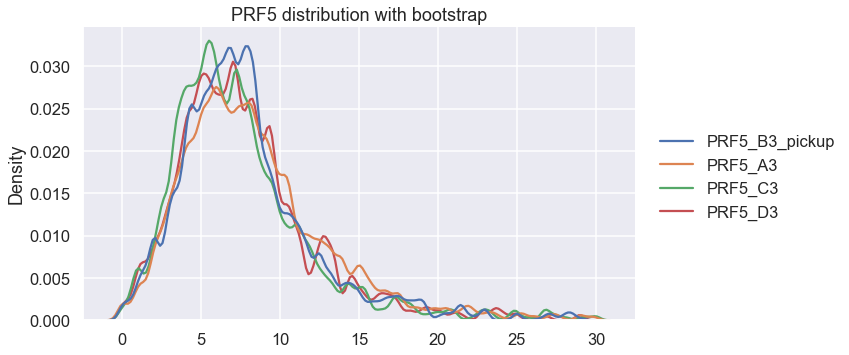

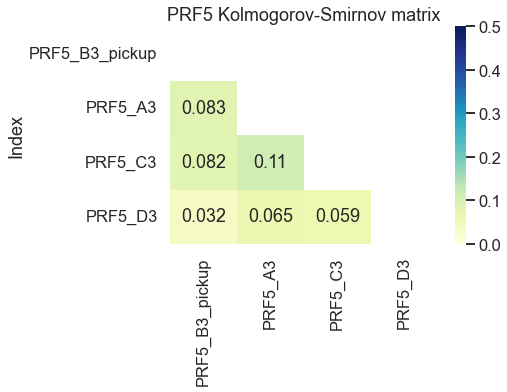

max_length:  336
dict_keys(['JHH4_B2', 'JHH4_A2', 'JHH4 D2', 'JHH4 C2 Pickup'])


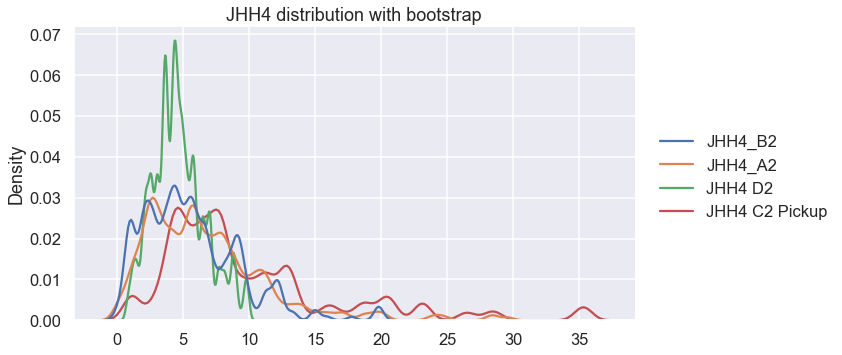

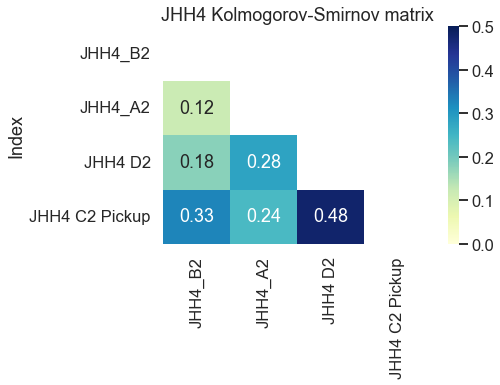

max_length:  958
dict_keys(['JHH6_A1', 'JHH6_B1', 'JHH6_D1', 'JHH6_C1_pickup'])


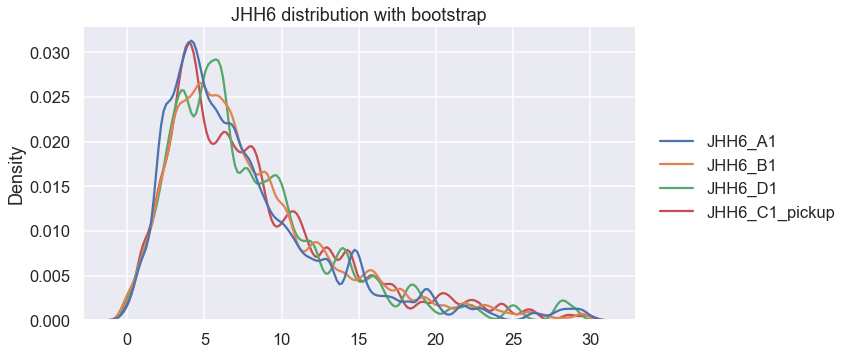

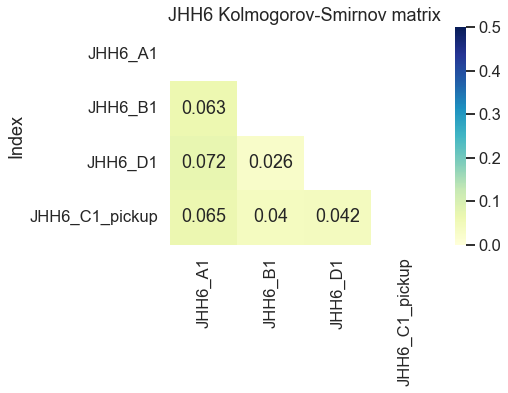

max_length:  285
dict_keys(['JHH7_C5', 'JHH7_D5', 'JHH7_A5', 'JHH7_B5_pickup'])


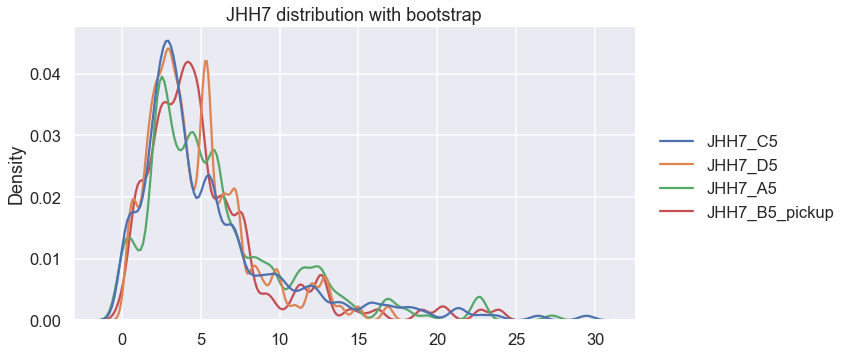

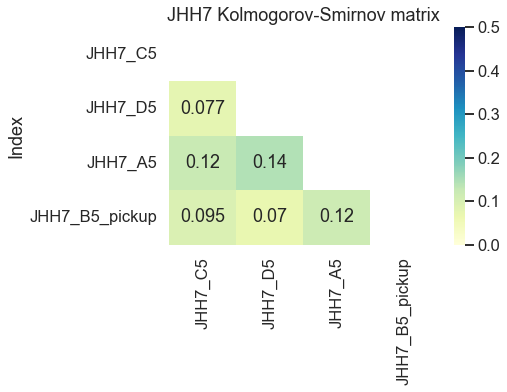

max_length:  80
dict_keys(['JHH7_2.5uM_n2', 'JHH7_2.5uM_n3', 'JHH7_2.5uM_n4', 'JHH7_2.5uM_n1'])


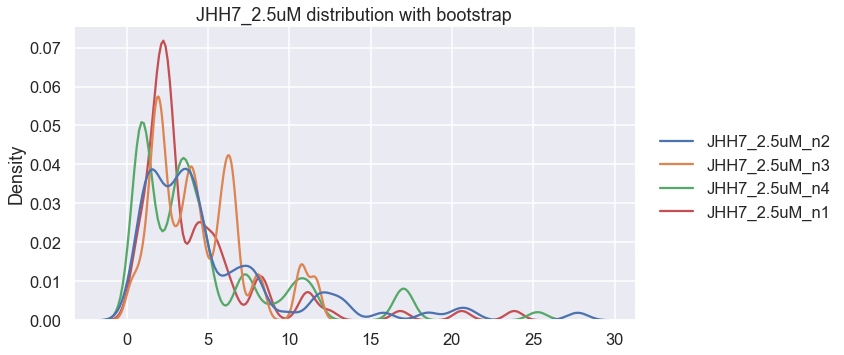

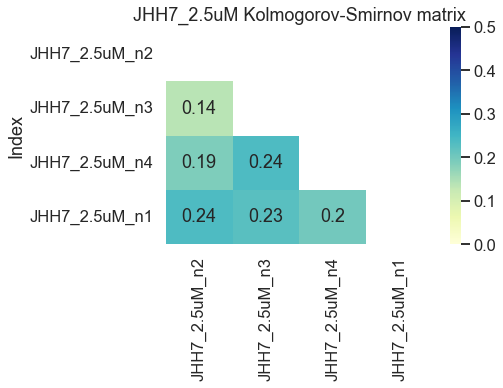

max_length:  2002
dict_keys(['JHH6_2.5uM_n2', 'JHH6_2.5uM_n3', 'JHH6_2.5uM_n4', 'JHH6_2.5uM_n1'])


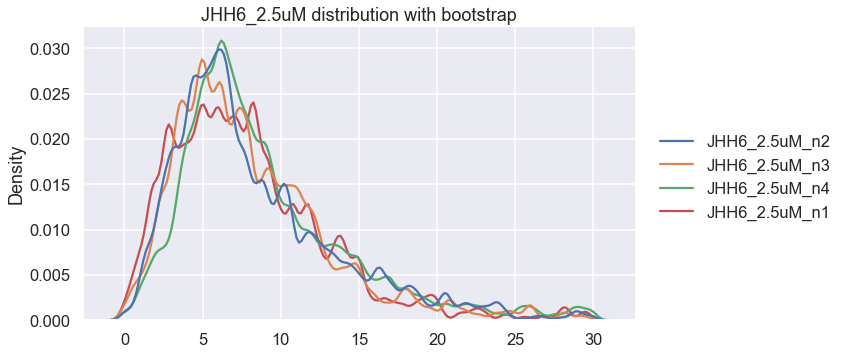

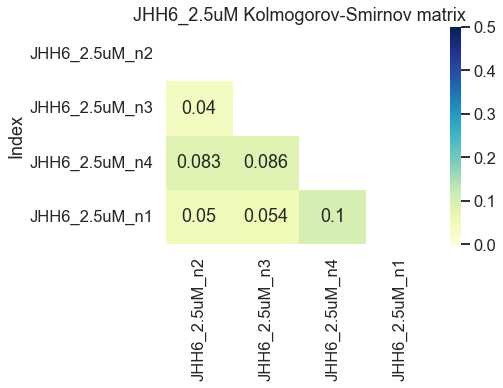

max_length:  87
dict_keys(['JHH7_0uM_n1', 'JHH7_0uM_n4', 'JHH7_0uM_n3', 'JHH7_0uM_n2'])


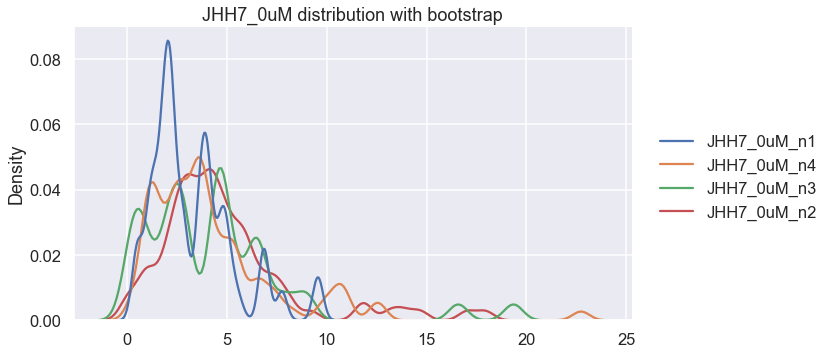

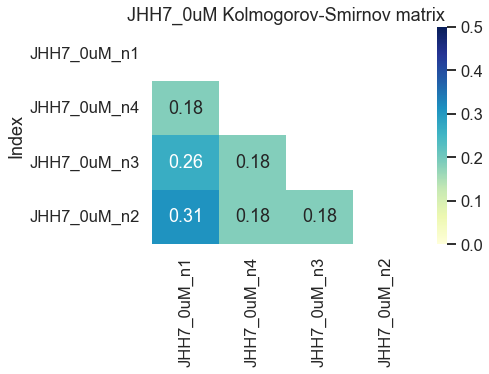

max_length:  502
dict_keys(['JHH6_0uM_n2', 'JHH6_0uM_n3', 'JHH6_0uM_n4', 'JHH6_0uM_n1'])


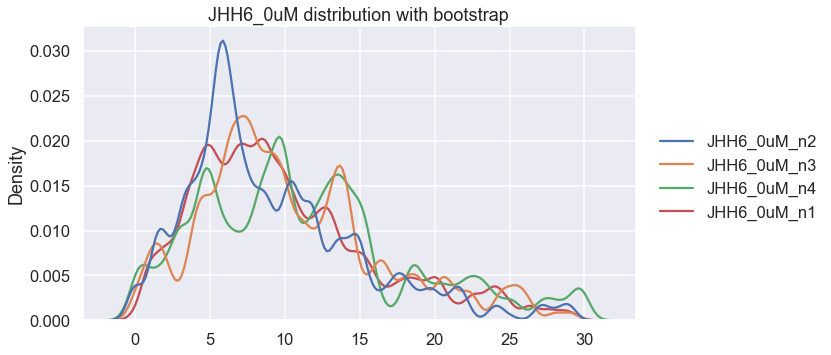

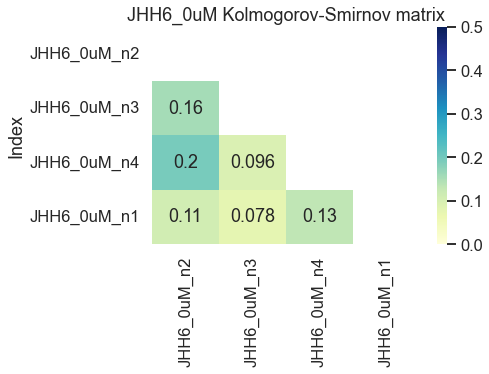

max_length:  139
dict_keys(['JHH7_1uM_n1', 'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4'])


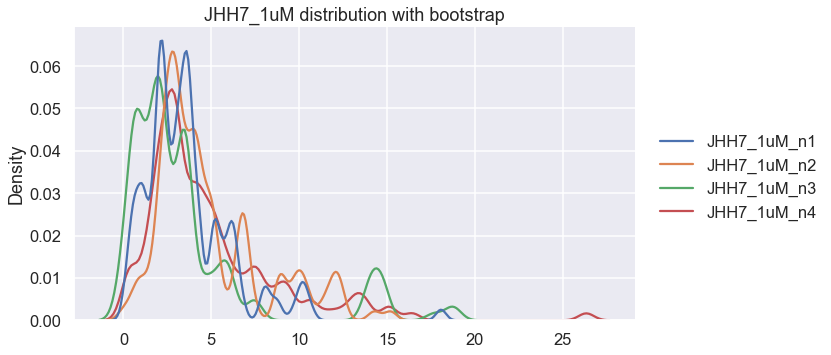

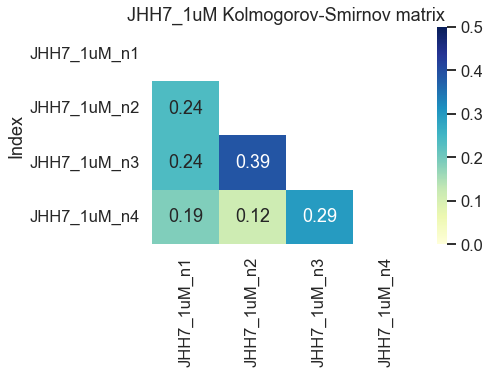

max_length:  386
dict_keys(['JHH6_1uM_n4', 'JHH6_1uM_n3', 'JHH6_1uM_n2', 'JHH6_1uM_n1'])


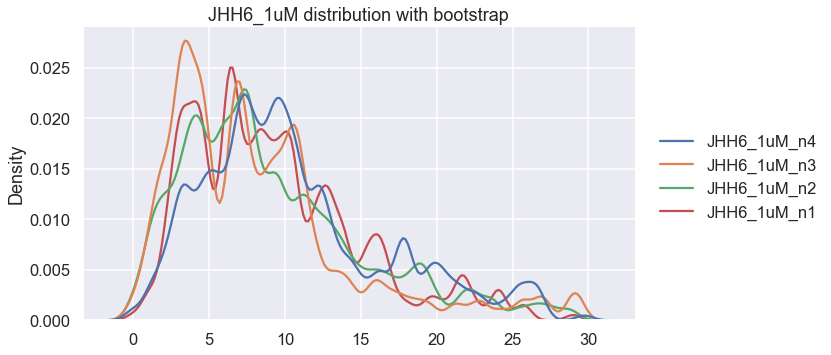

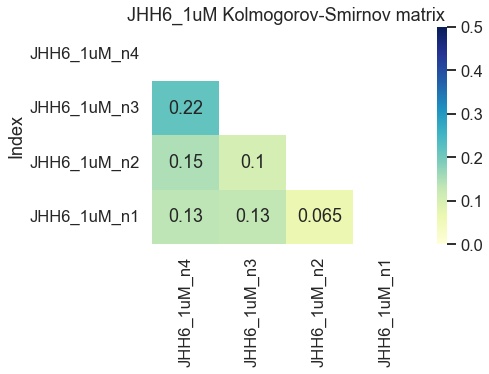

max_length:  2583
dict_keys(['Huh7_B4_Pickup', 'Huh7_A4', 'Huh7_C4', 'Huh7_D4'])


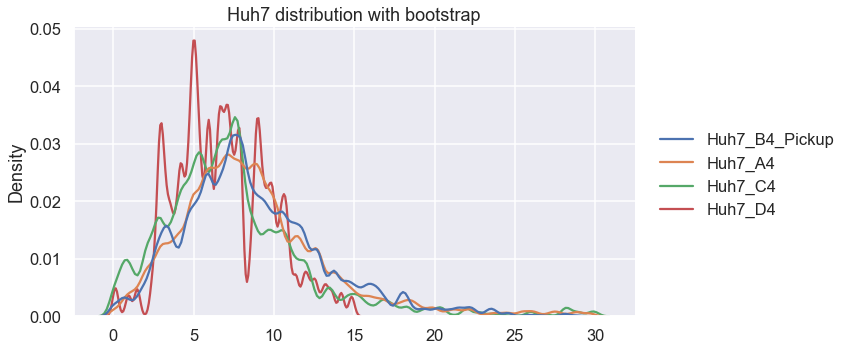

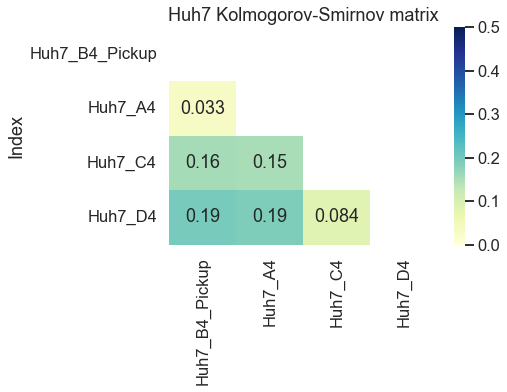

max_length:  618
dict_keys(['Kami41_A6', 'Kami41_C6', 'Kami41_D6', 'Kami41_B6_pickup'])


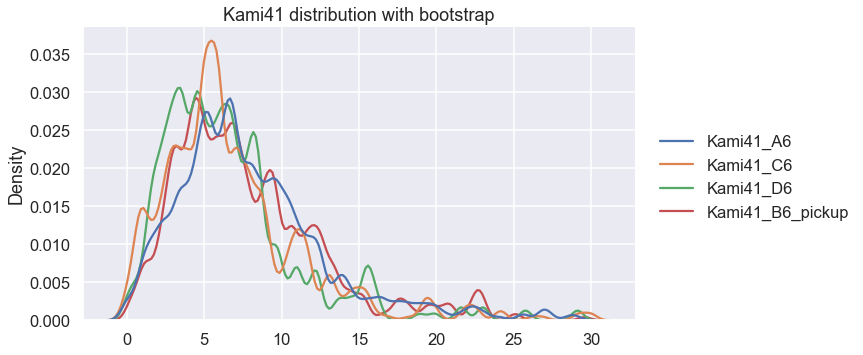

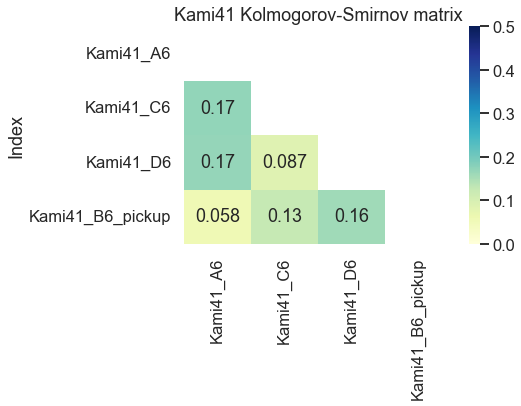

In [6]:
cell_lines = df.cell_line.unique()
for cell_line in cell_lines:
    individual_distribution_and_ks(data=df, cell_line=cell_line)

# View all plots together

In [7]:
target_dir = '/Users/jonathanlifferth/PycharmProjects/HCC_analysis/distribution/cell_line_comparison/bootstrap/images/individual_cells/'
individual_cell_paths = []

for root, dirs, files in os.walk(target_dir):
    for file in files:
        if file.endswith('.png'):
            individual_cell_paths.append(os.path.join(root,file))
len(individual_cell_paths)/2
individual_cell_paths.sort()


In [8]:
# create list of images
individual_cell_imgs = []
for path in individual_cell_paths:
    filename = path
    img = mpimg.imread(filename)
    individual_cell_imgs.append(img)


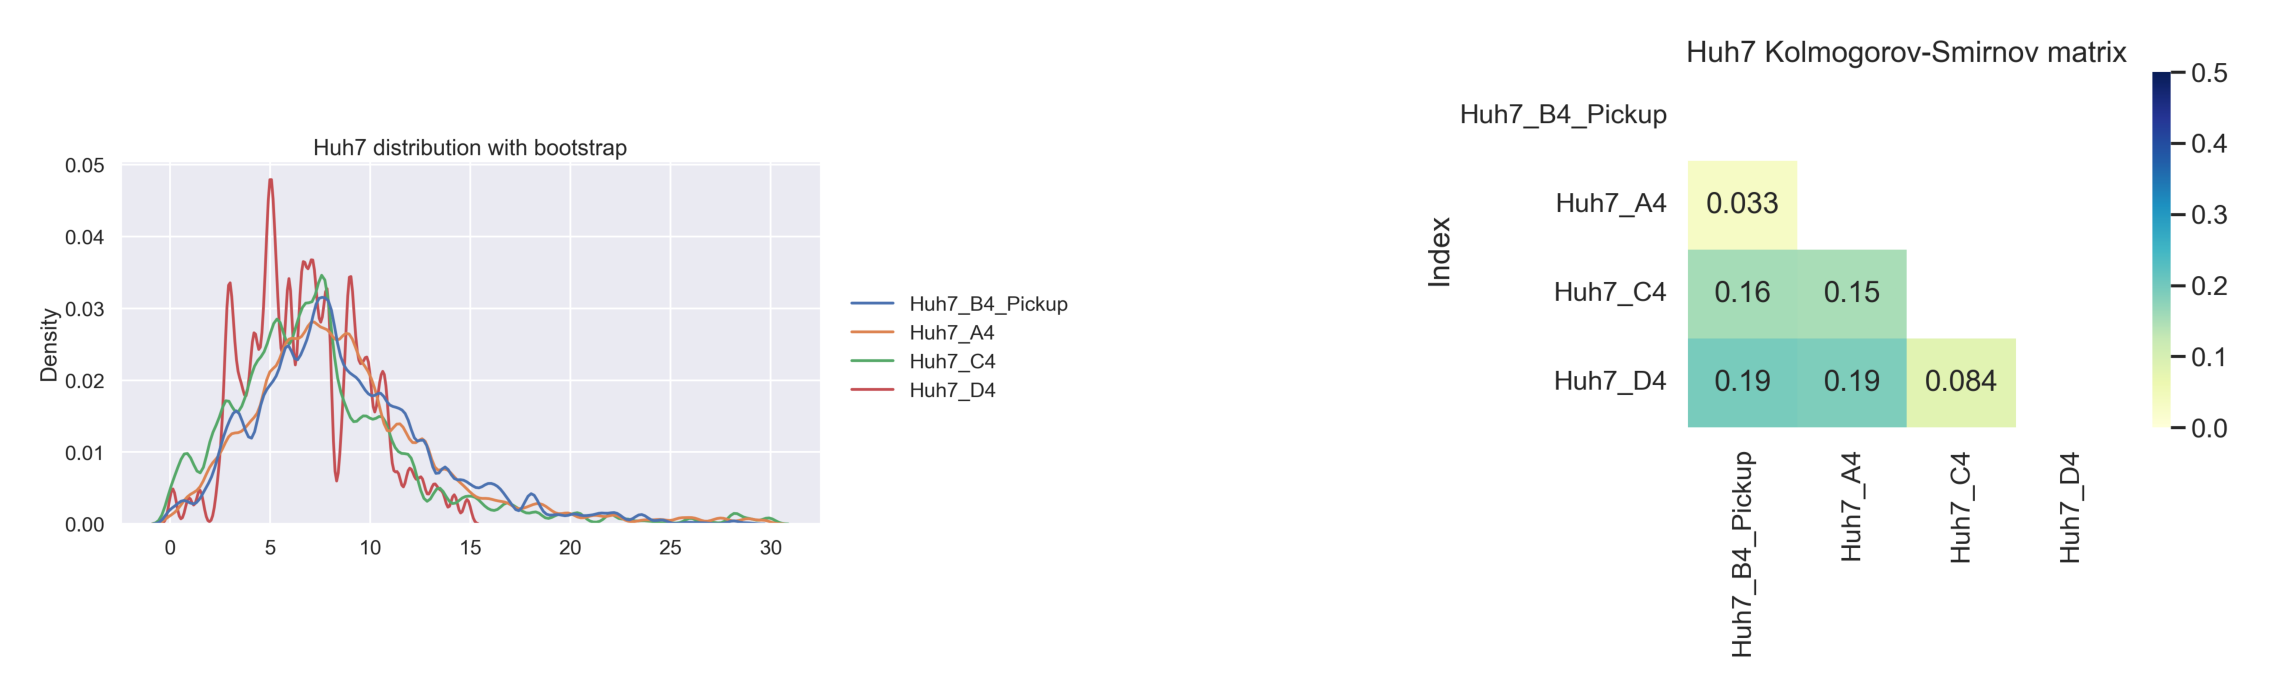

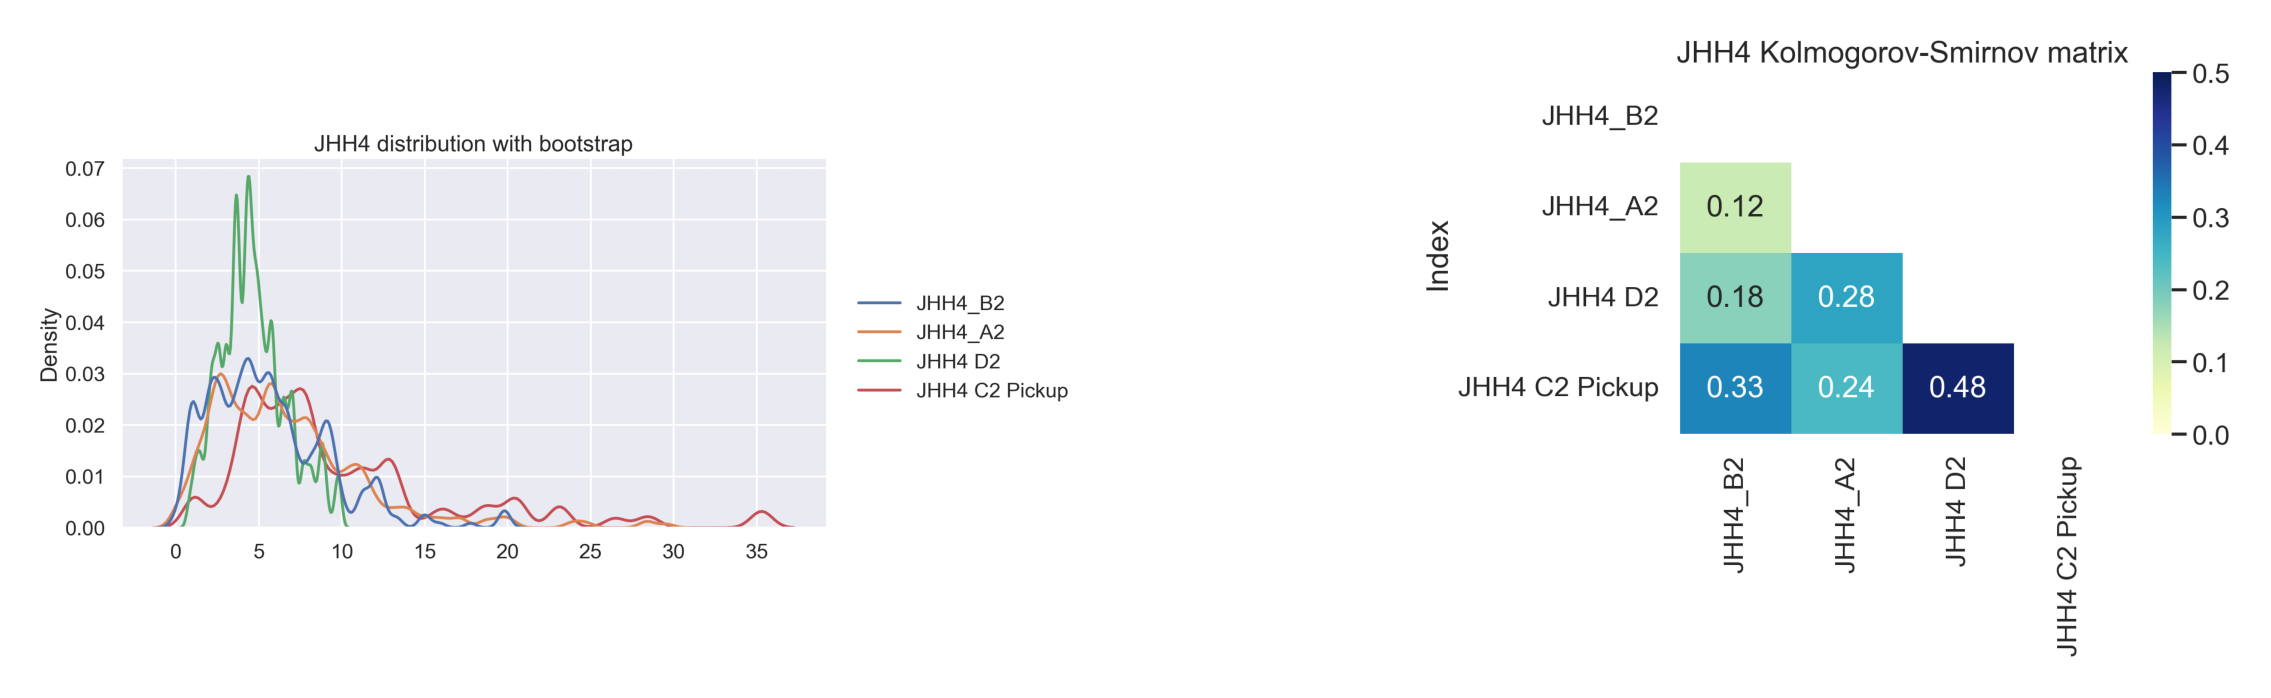

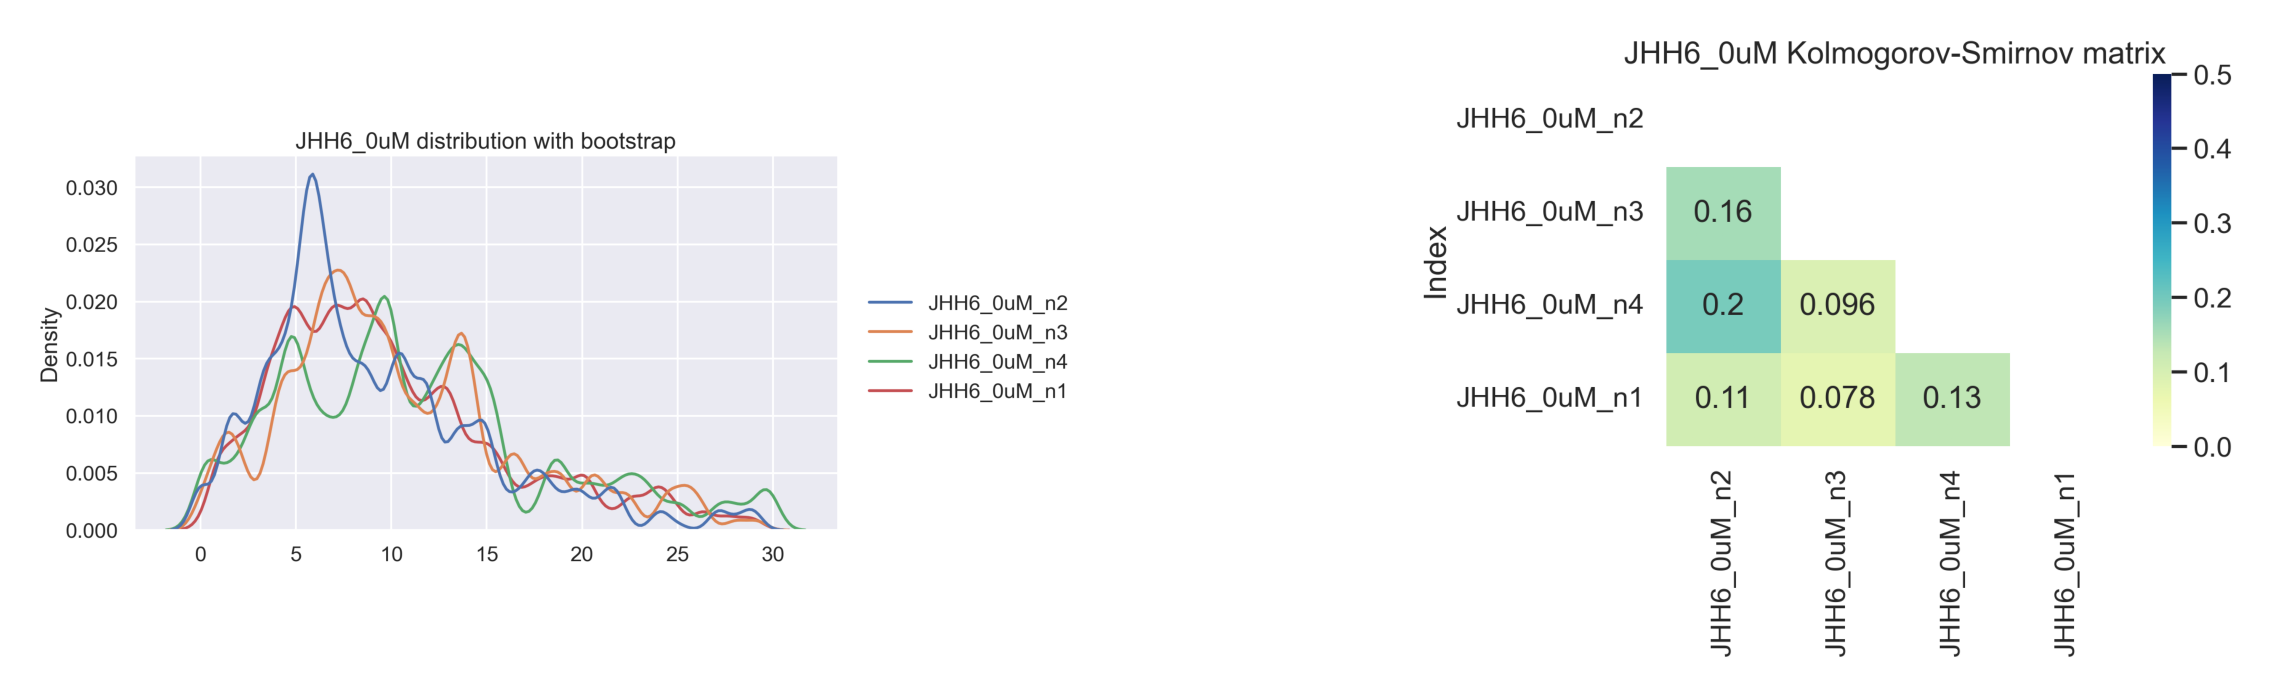

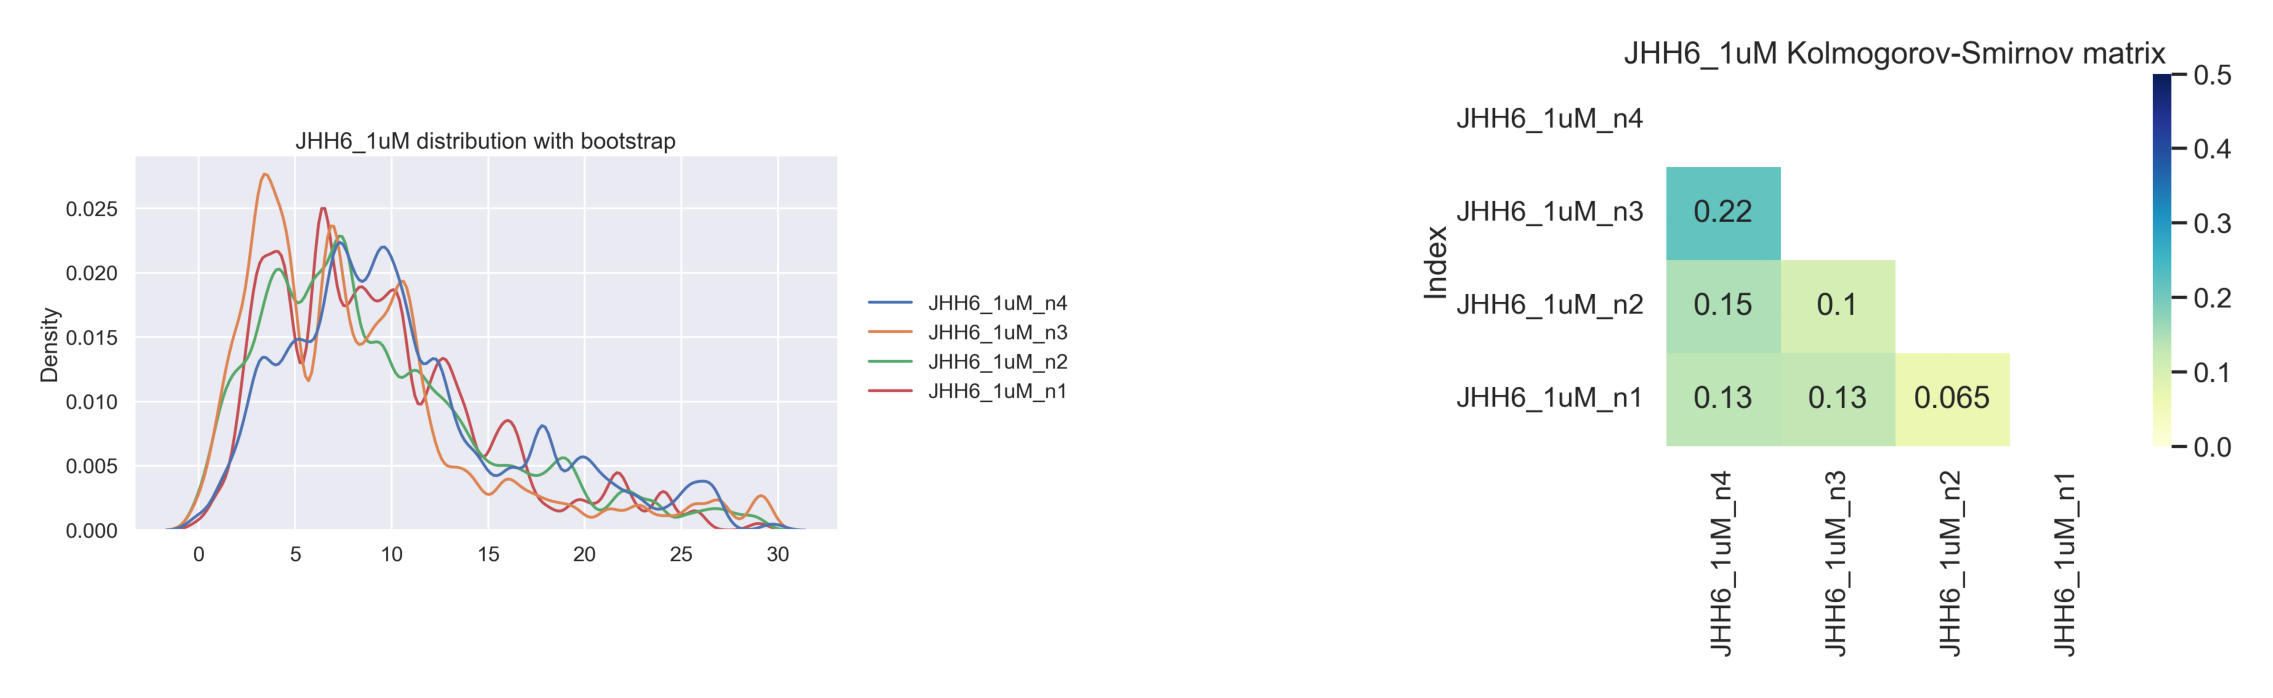

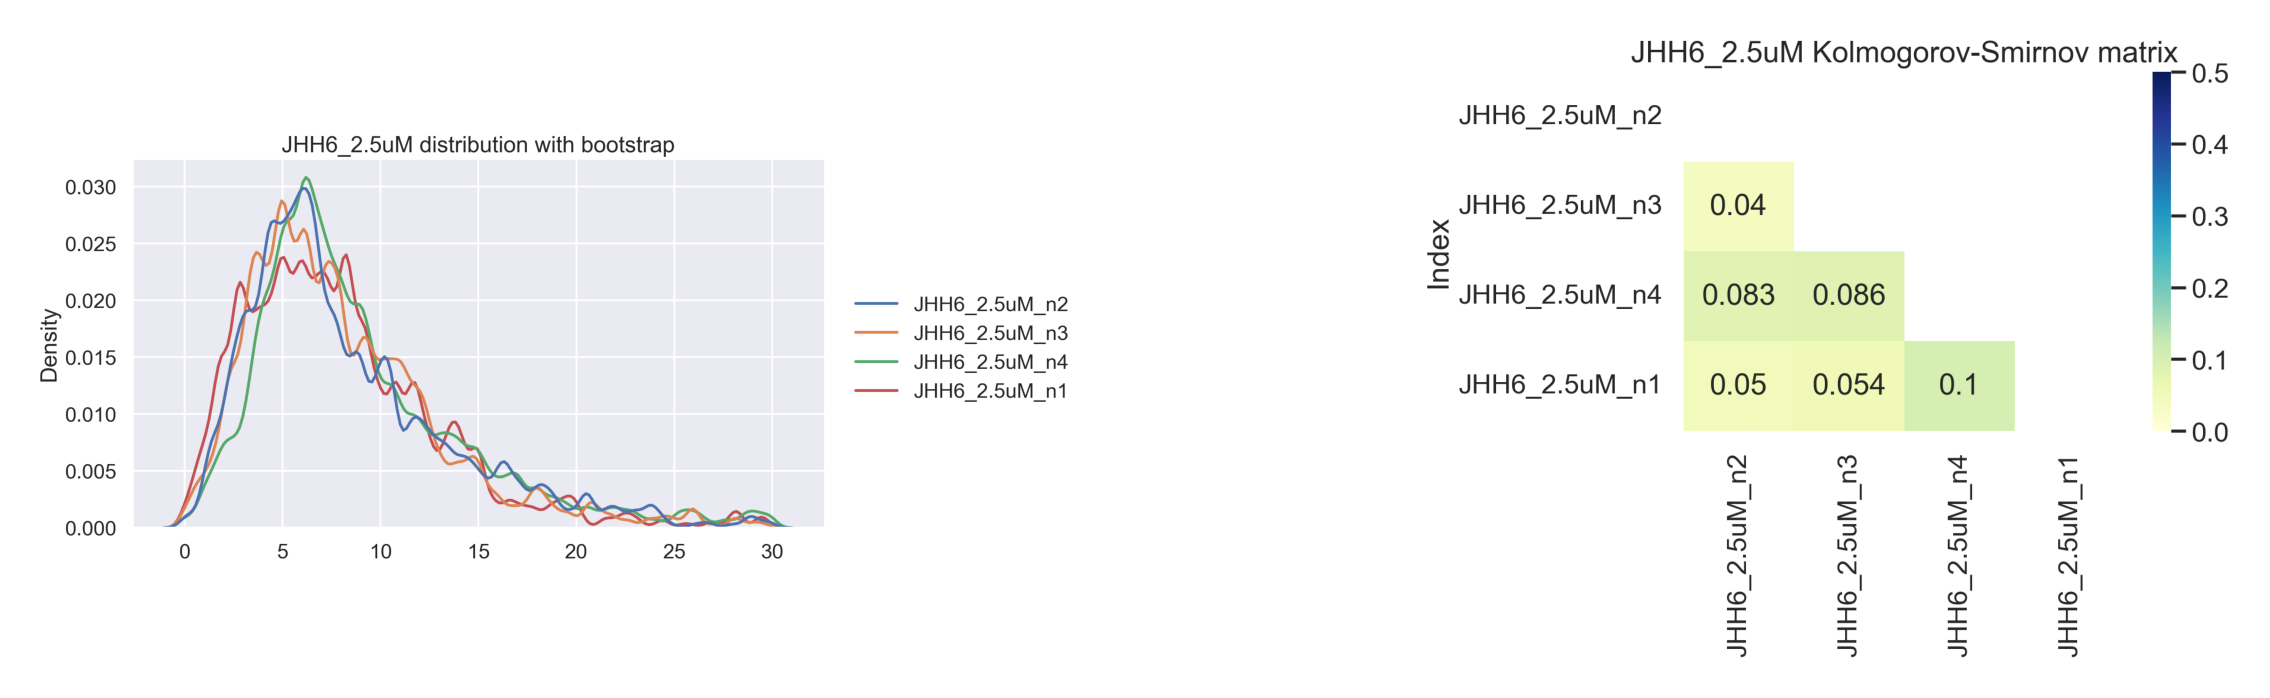

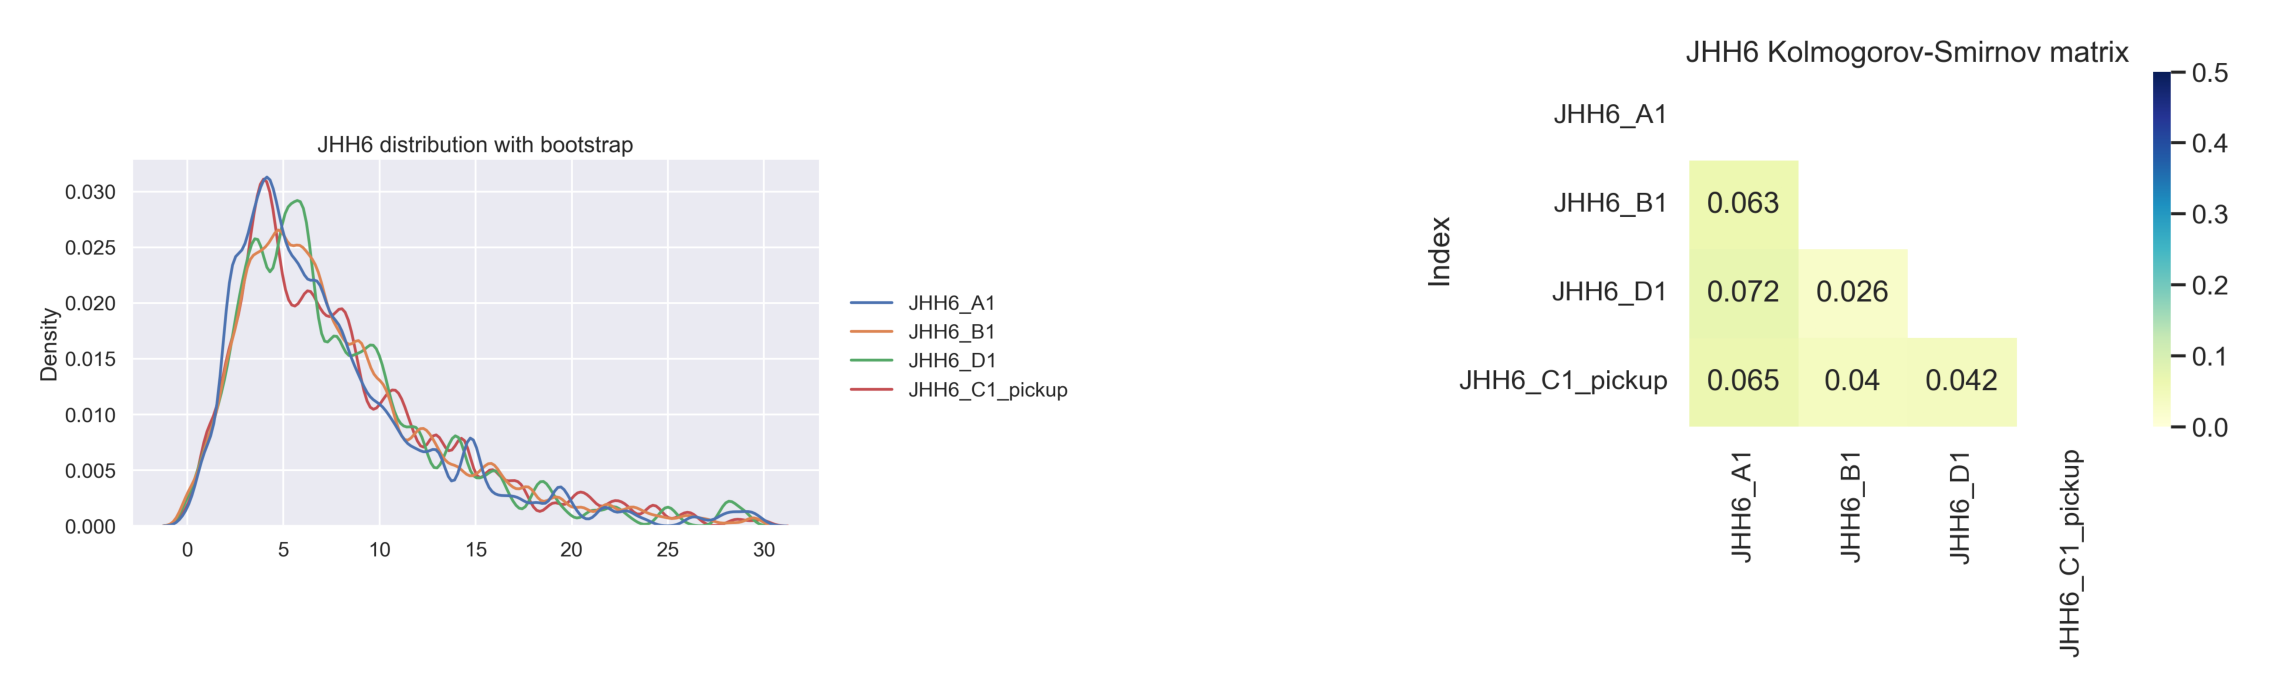

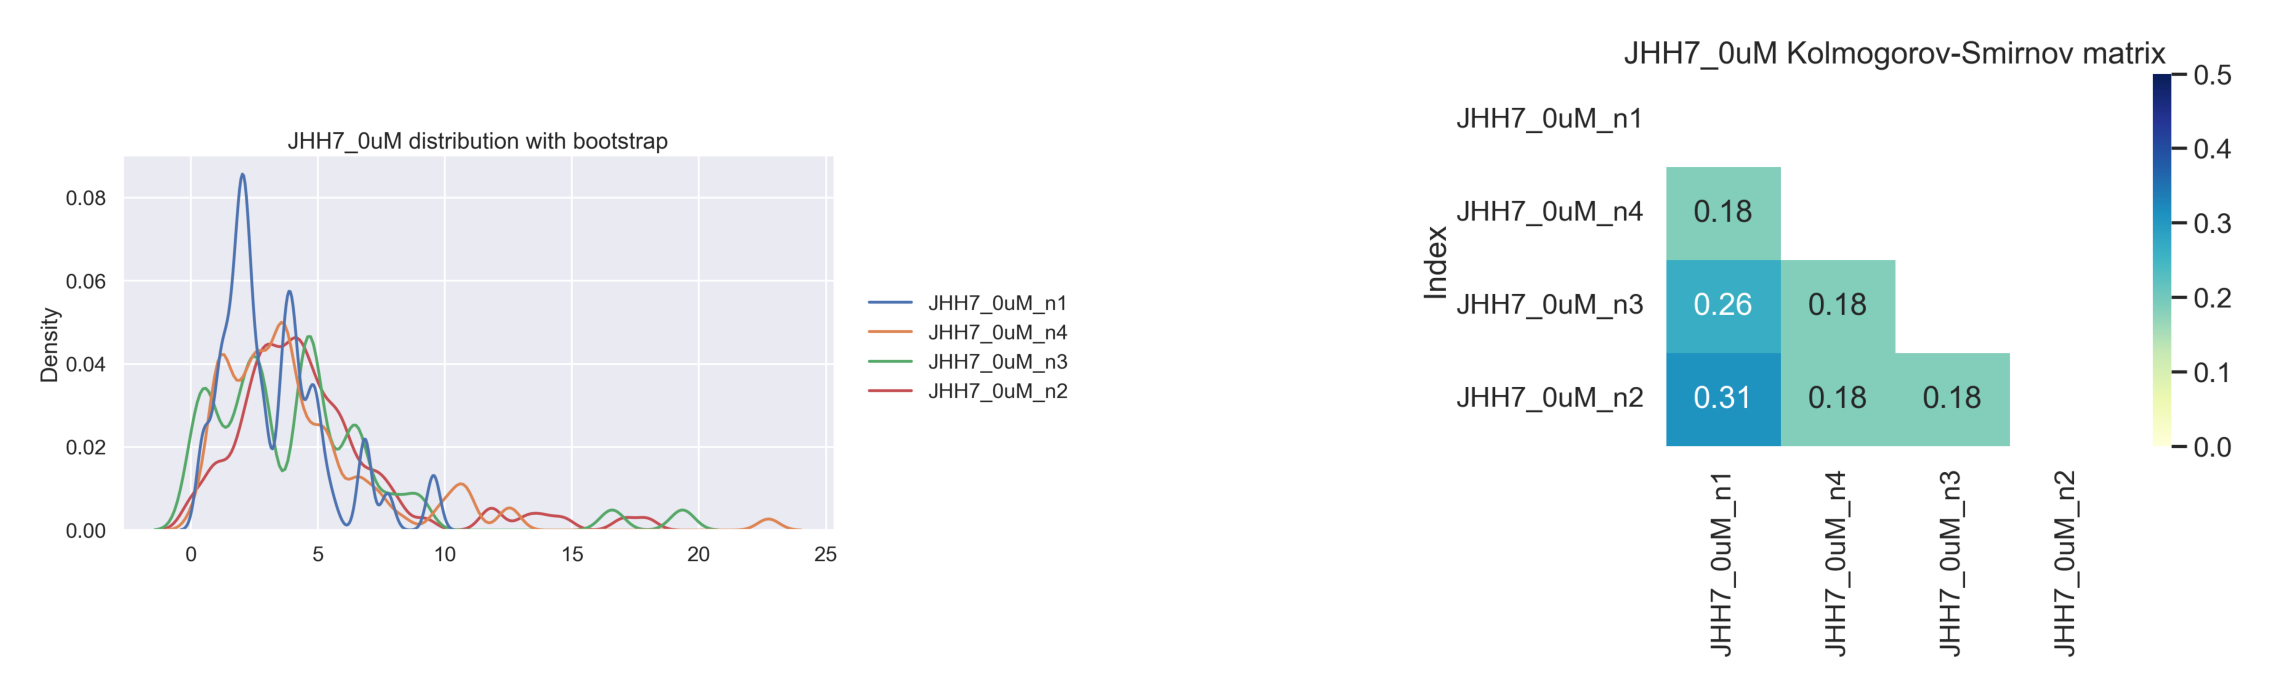

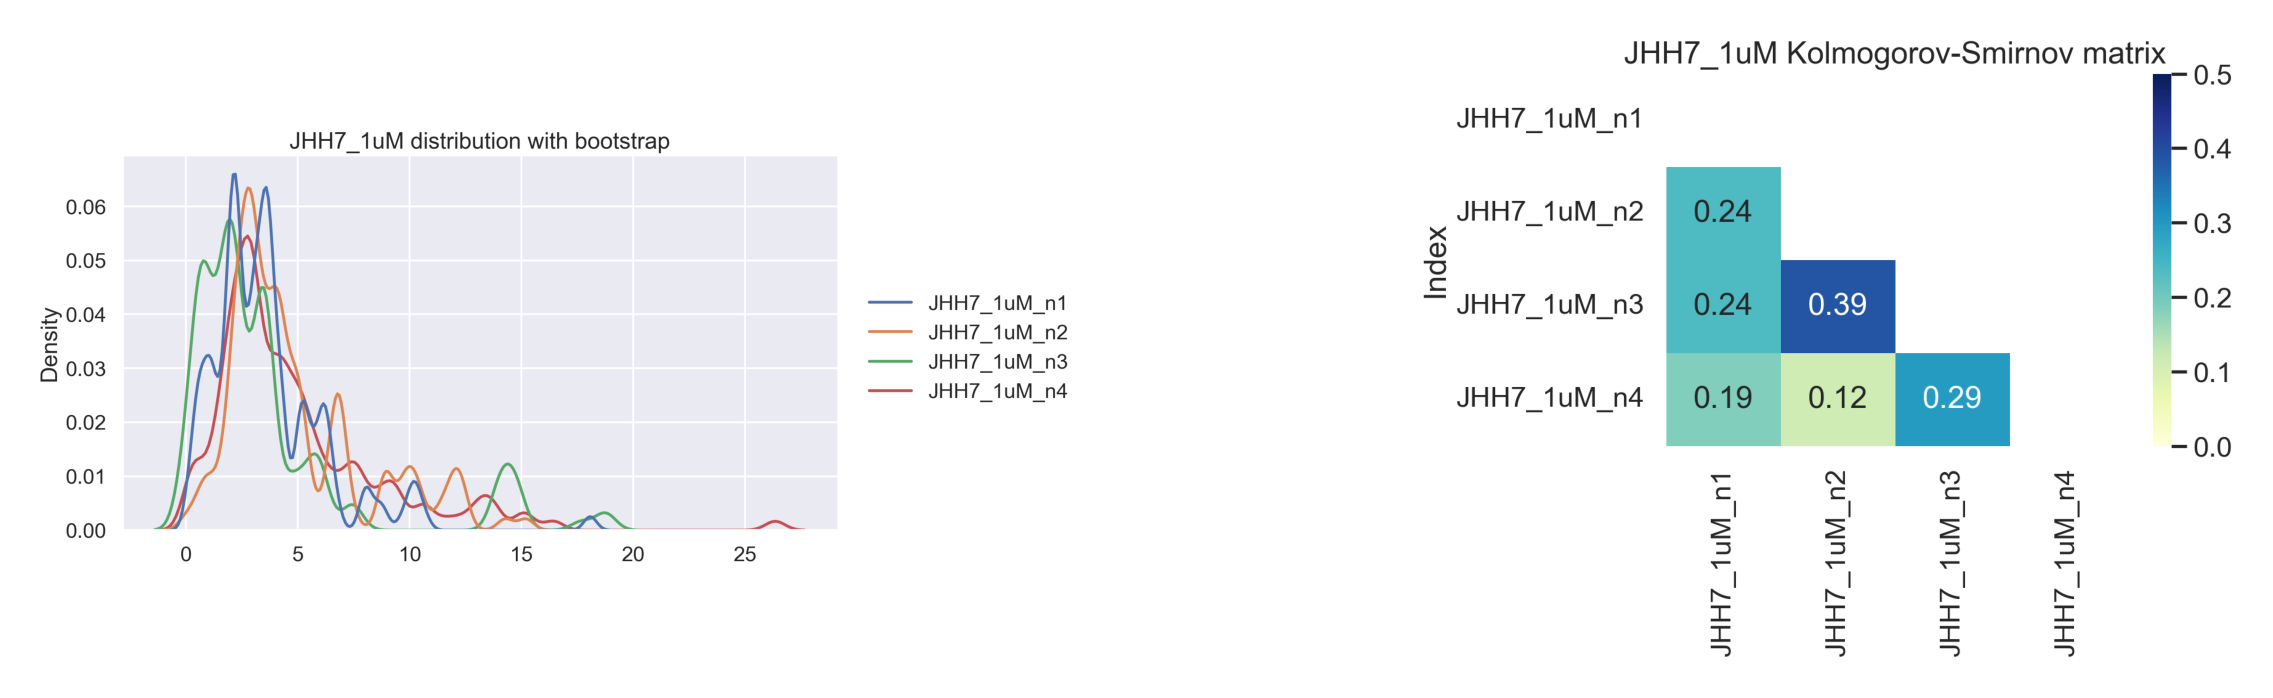

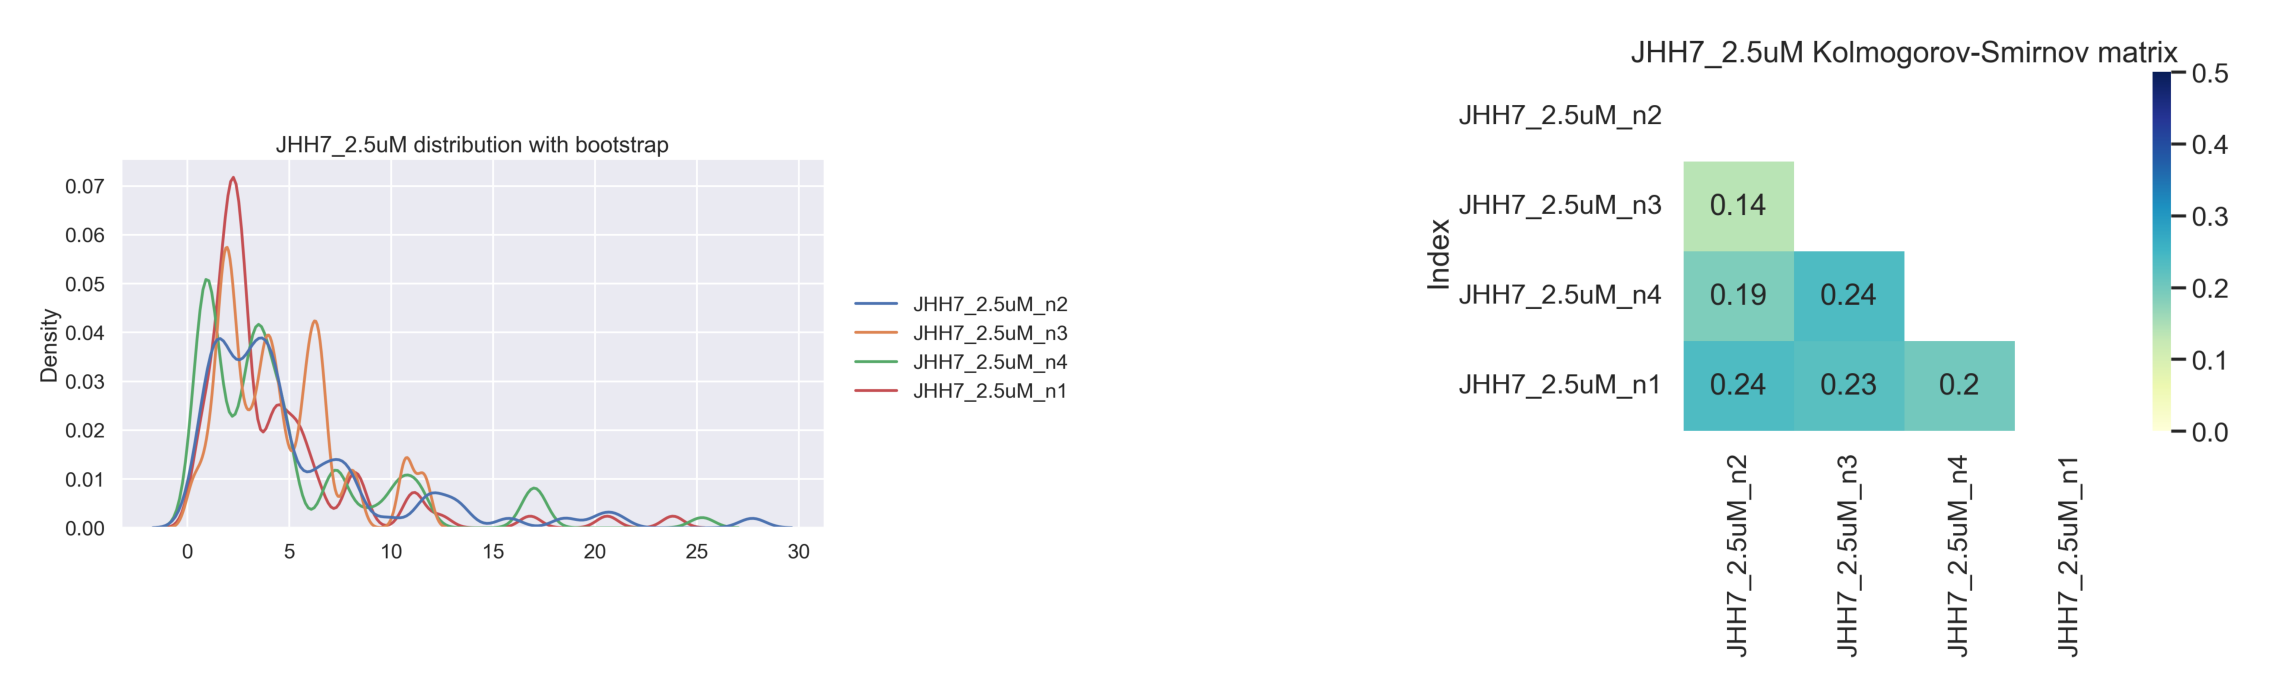

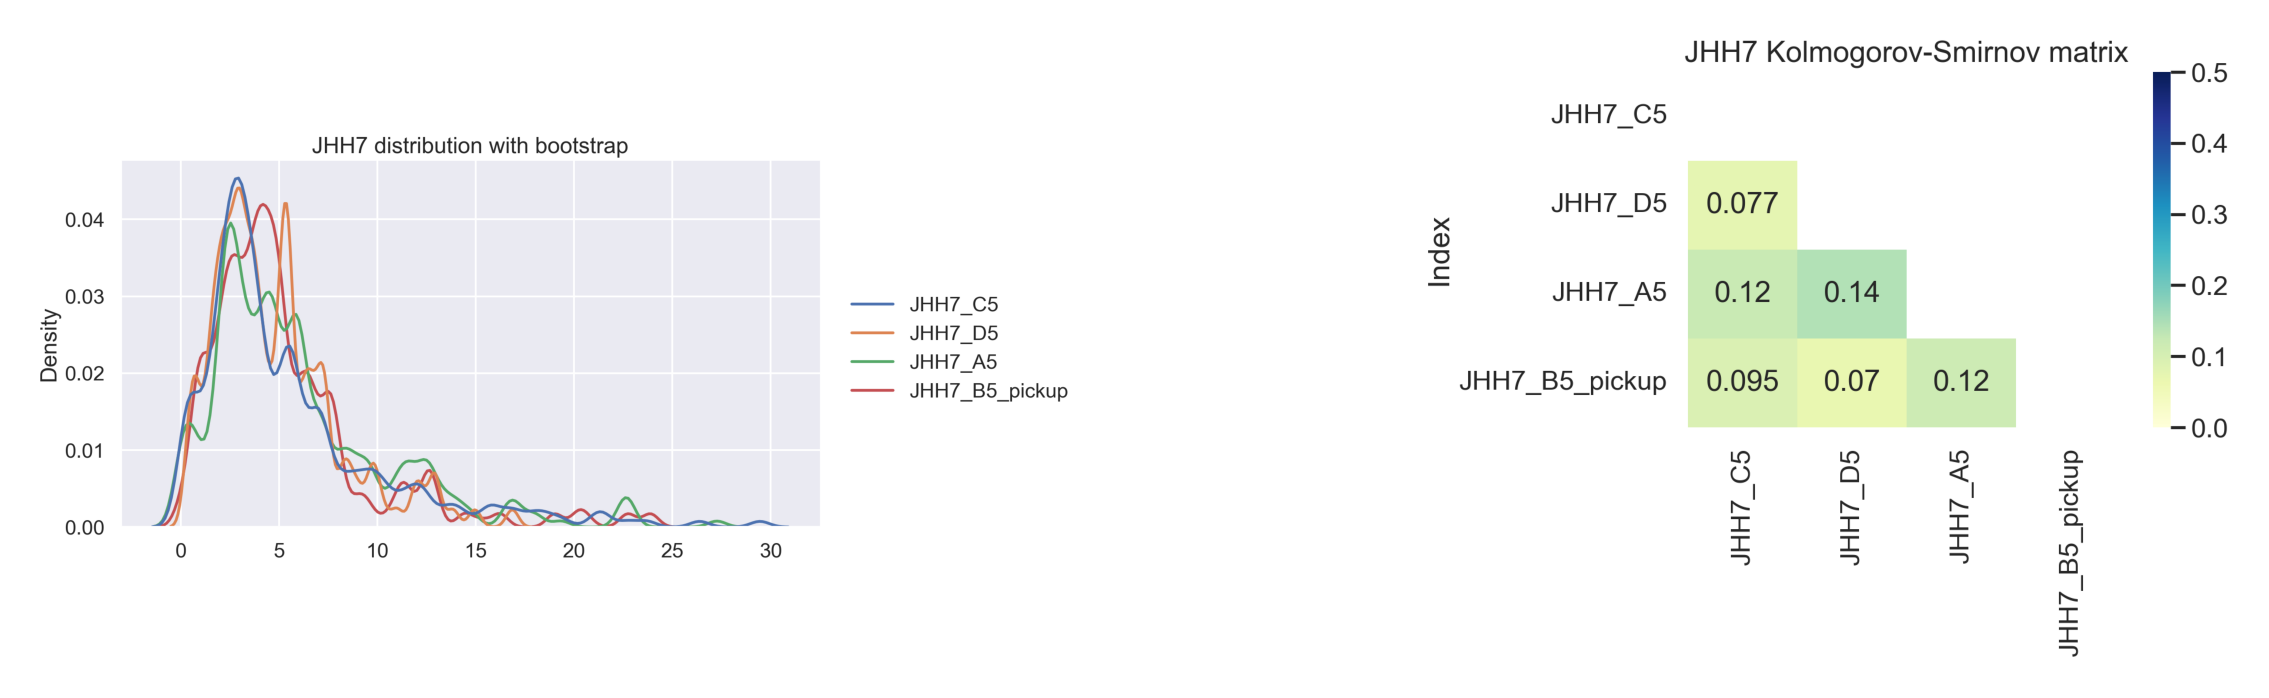

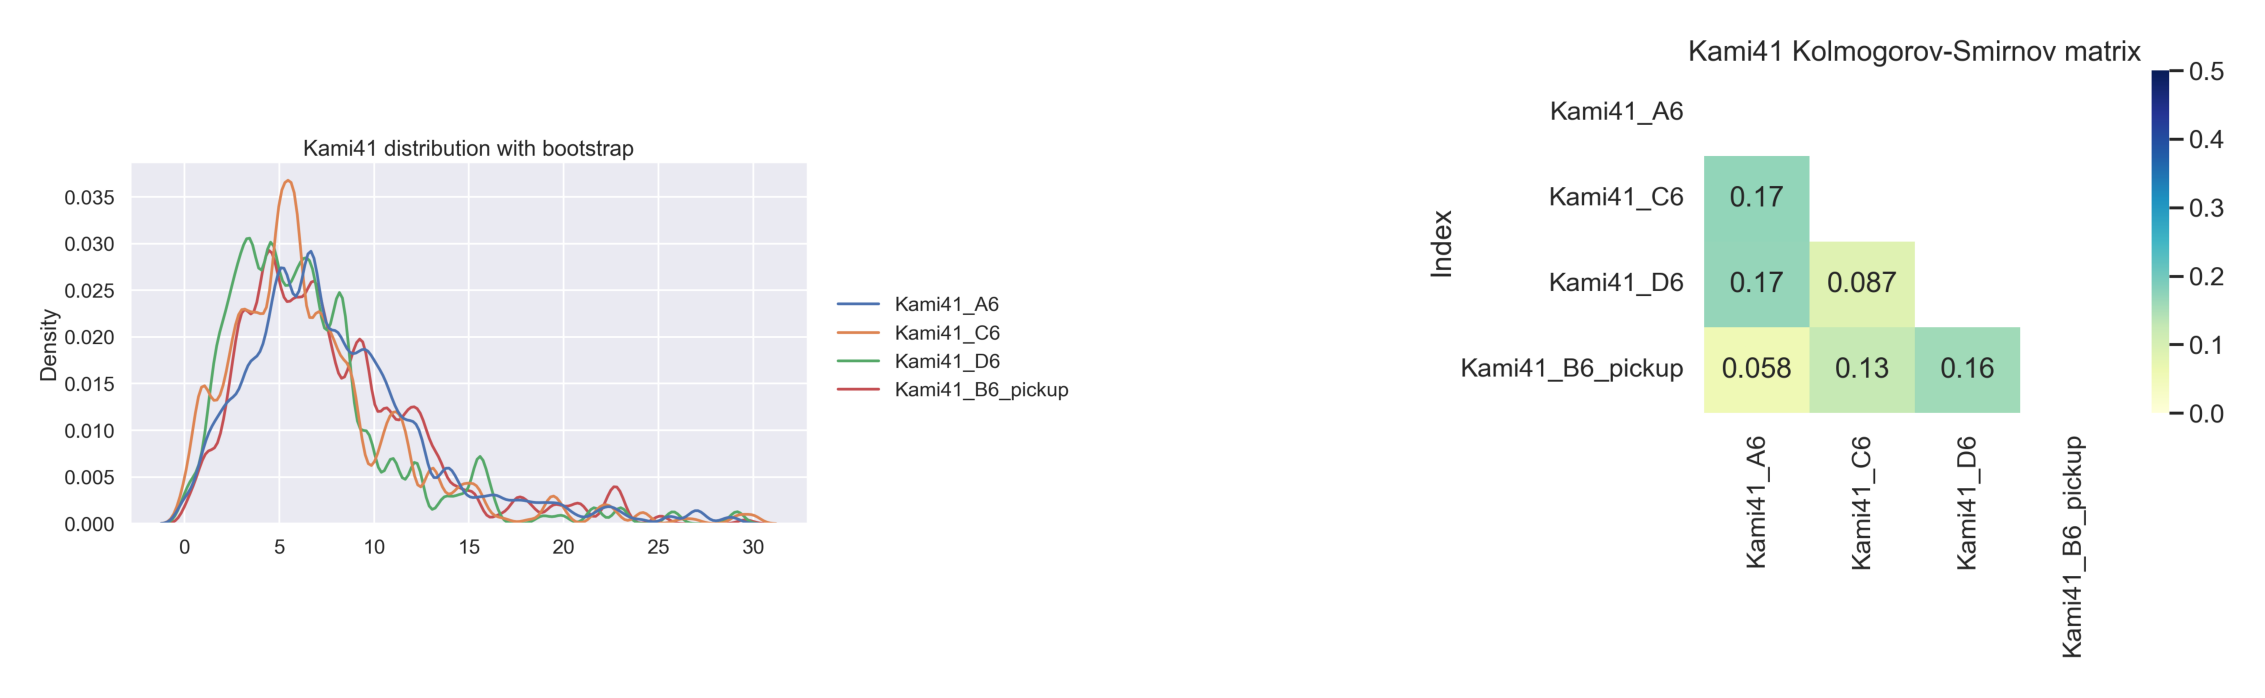

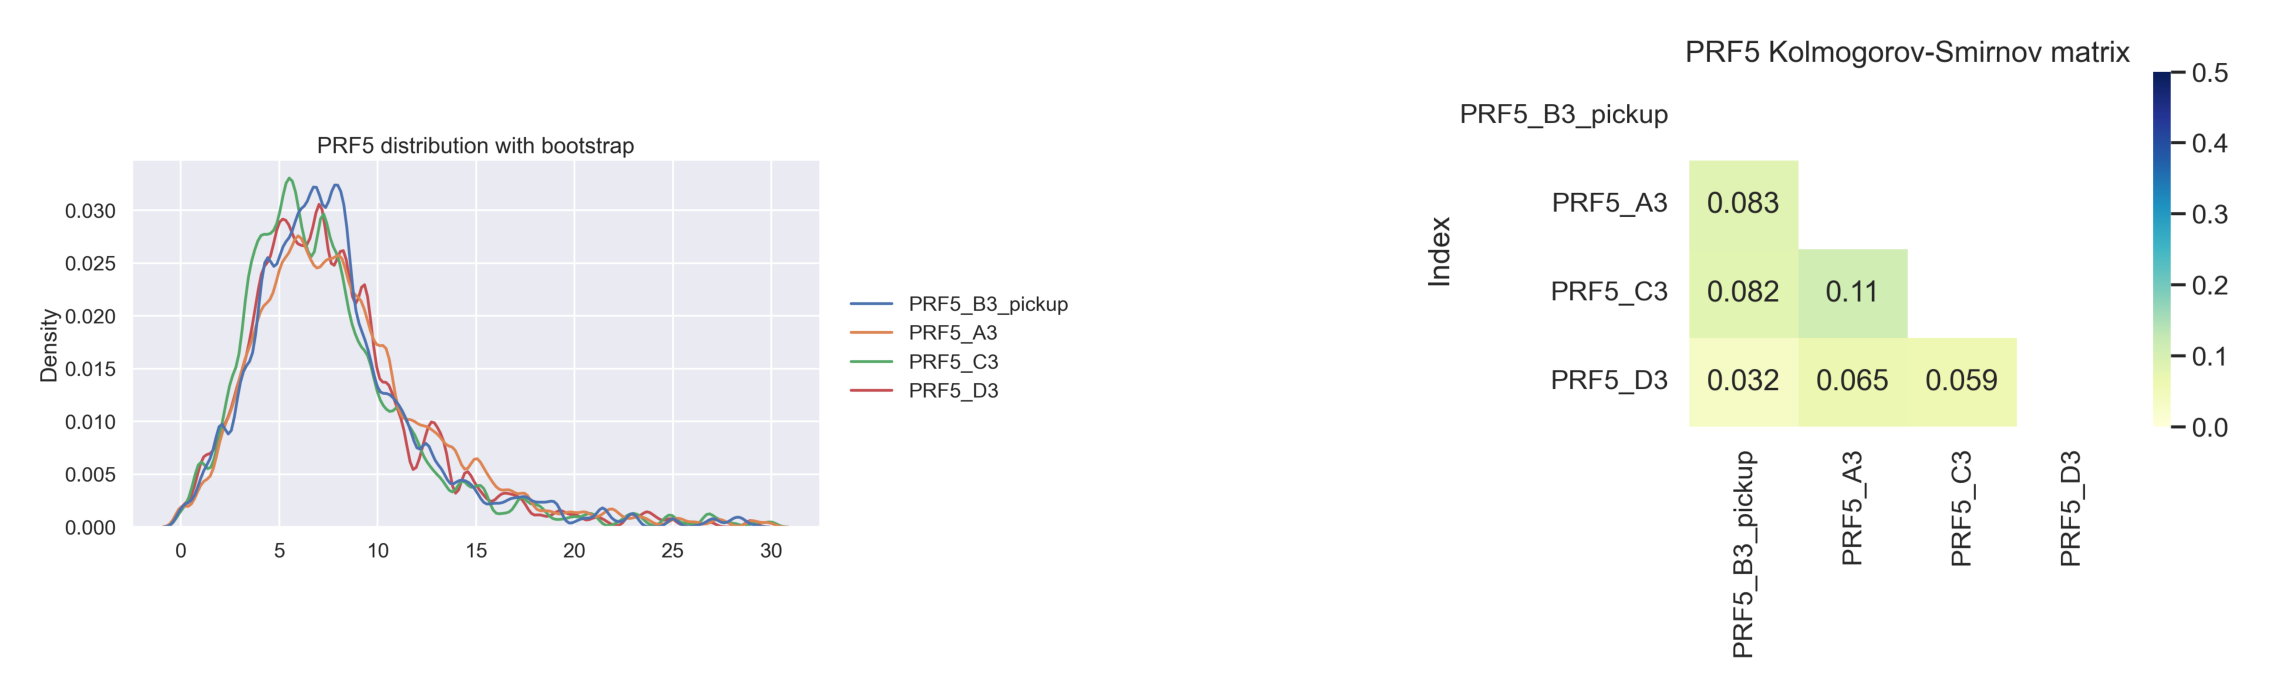

In [9]:
sns.reset_orig()

index = 0

rows = int(len(individual_cell_imgs)/2)
for i in range(rows):
    figure(figsize=(10, 40), dpi=300)
    
    plt.subplot(rows, 2, index + 1)
    plt.axis("off")
    imgplot1 = plt.imshow(individual_cell_imgs[index])
#     plt.show()
    
    plt.subplot(rows, 2, (index + 2))
    plt.axis("off")
    imgplot2 = plt.imshow(individual_cell_imgs[index + 1])
    plt.show()
    
    index += 2

In [10]:
all_ks_values = []

def individual_distribution_and_collect_ks(data, cell_line):
    bootstrap_dict = perform_bootstrap(dataframe=data, cell_line=cell_line)
    bootstrap_df = pd.DataFrame.from_dict(bootstrap_dict)
    bootstrap_df = bootstrap_df.reset_index(drop=True)
    bootstrap_df
    
    # calculate Kolmogorov-Smirnov
    series_list = bootstrap_df.columns
    ks_values = []
    # calculate KS values
    for i in range(len(series_list)):
        results_list = [series_list[i]]
        for j in range(len(series_list)):
            p = series_list[i]
            q = series_list[j]
            comparison = p + " x " + q
            p = bootstrap_df[p]
            q = bootstrap_df[q]
            ks_result = ks_2samp(p, q)[0]
            results_list.append(ks_result)

        ks_values.append(results_list)
    
    # convert to dataframe
    ks_df = pd.DataFrame(ks_values, columns = ['Index', series_list[0], series_list[1], series_list[2], 
                                            series_list[3]])
    ks_df = ks_df.set_index('Index')
    # plot distribution
    sns.displot(bootstrap_df, kind="kde", bw_adjust=.3, 
                height=5, aspect=15/8).set(title='{} distribution with bootstrap'.format(cell_line))
#     plt.savefig('./images/individual_cells/{}_kde.png'.format(cell_line), dpi=200, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    with sns.axes_style("white"):
        mask = np.zeros_like(ks_df)
        mask[np.triu_indices_from(mask)] = True    
        sns.heatmap(ks_df, annot=True, mask=mask, vmin=0, vmax=0.5, 
                    cmap="YlGnBu").set(title='{} Kolmogorov-Smirnov matrix'.format(cell_line))
#         plt.savefig('./images/individual_cells/{}_ks_heatmap.png'.format(cell_line), dpi=200, bbox_inches='tight', pad_inches=0.1)
        all_ks_values.append(ks_df)
    plt.show()


max_length:  2314
dict_keys(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3'])


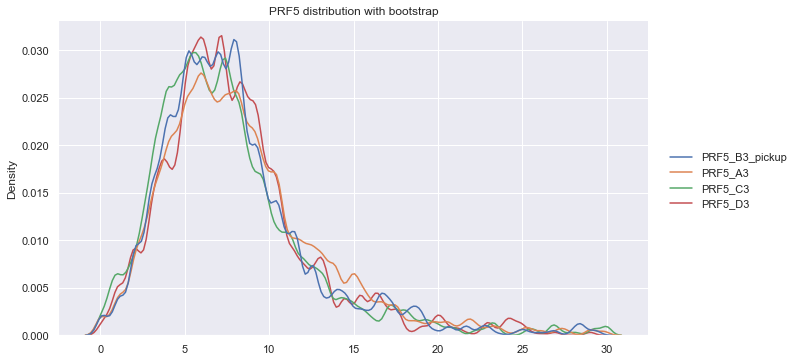

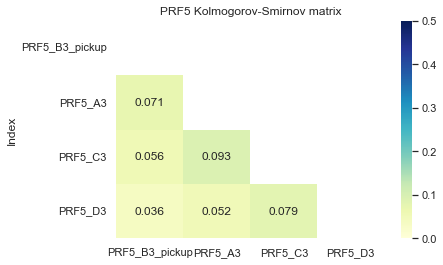

max_length:  336
dict_keys(['JHH4_B2', 'JHH4_A2', 'JHH4 D2', 'JHH4 C2 Pickup'])


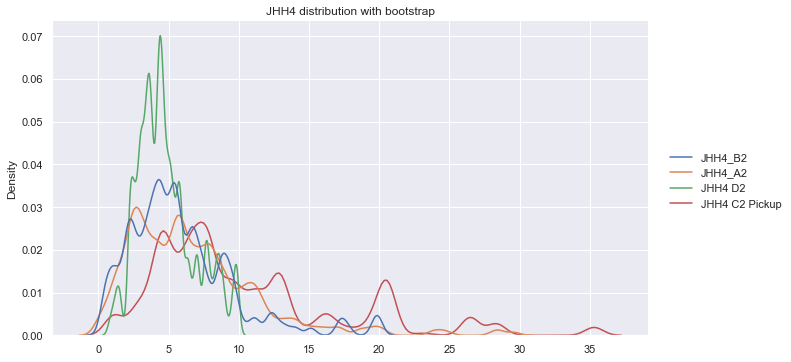

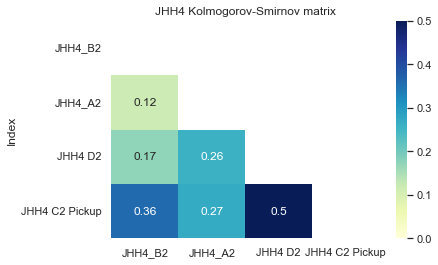

max_length:  958
dict_keys(['JHH6_A1', 'JHH6_B1', 'JHH6_D1', 'JHH6_C1_pickup'])


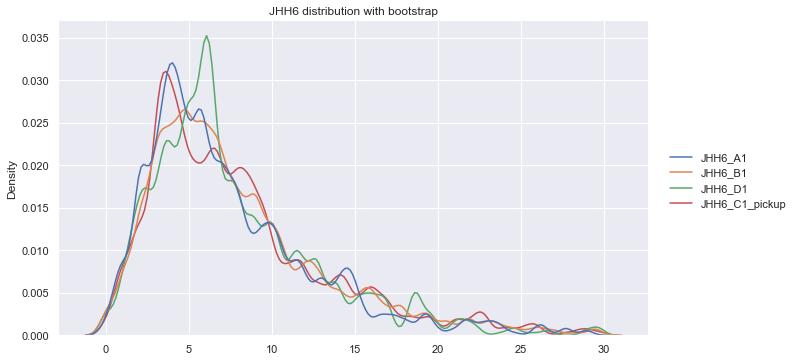

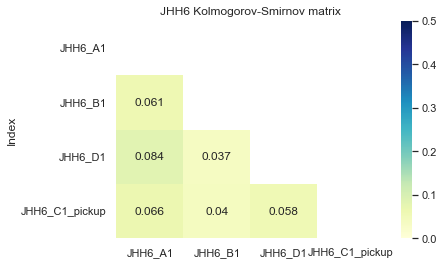

max_length:  285
dict_keys(['JHH7_C5', 'JHH7_D5', 'JHH7_A5', 'JHH7_B5_pickup'])


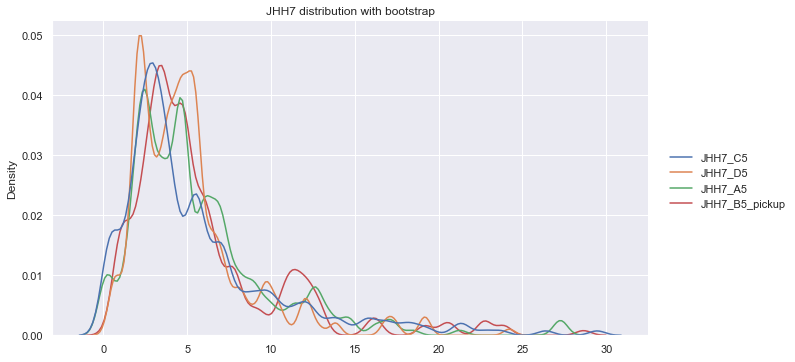

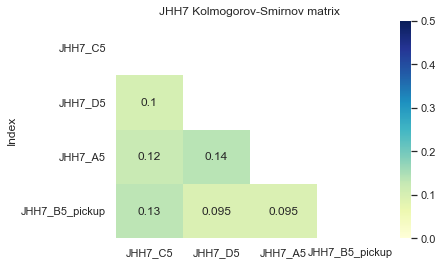

max_length:  80
dict_keys(['JHH7_2.5uM_n2', 'JHH7_2.5uM_n3', 'JHH7_2.5uM_n4', 'JHH7_2.5uM_n1'])


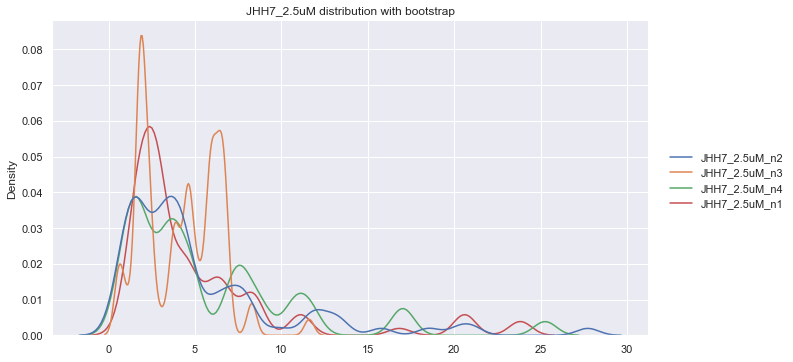

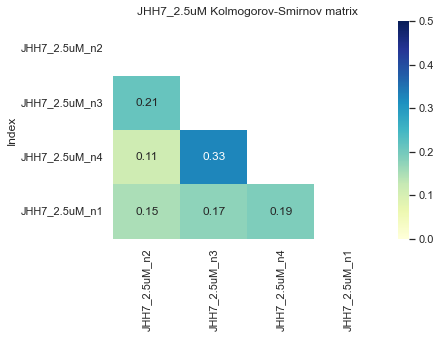

max_length:  2002
dict_keys(['JHH6_2.5uM_n2', 'JHH6_2.5uM_n3', 'JHH6_2.5uM_n4', 'JHH6_2.5uM_n1'])


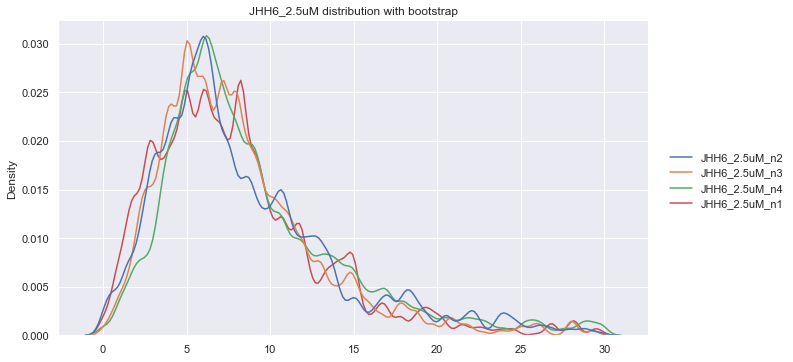

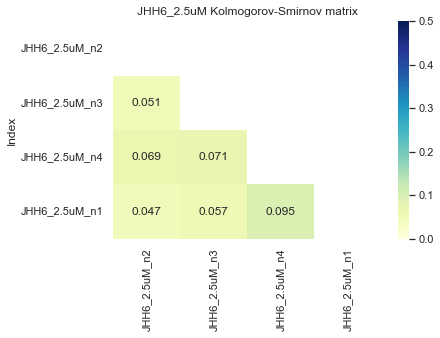

max_length:  87
dict_keys(['JHH7_0uM_n1', 'JHH7_0uM_n4', 'JHH7_0uM_n3', 'JHH7_0uM_n2'])


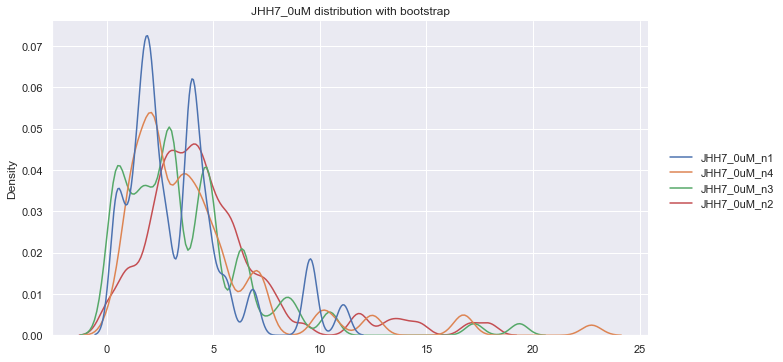

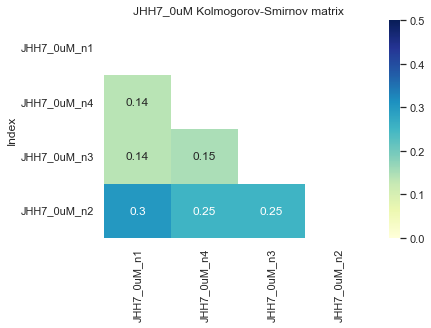

max_length:  502
dict_keys(['JHH6_0uM_n2', 'JHH6_0uM_n3', 'JHH6_0uM_n4', 'JHH6_0uM_n1'])


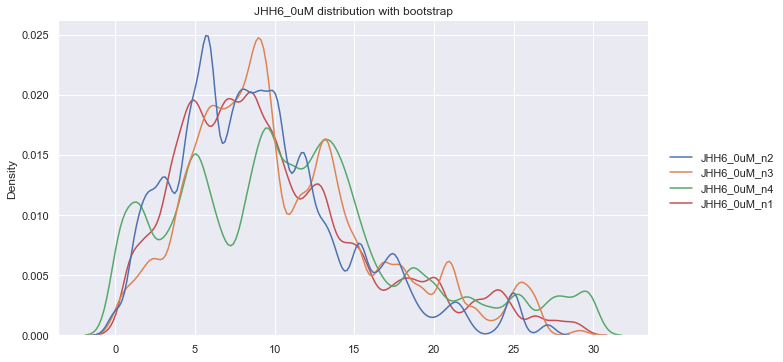

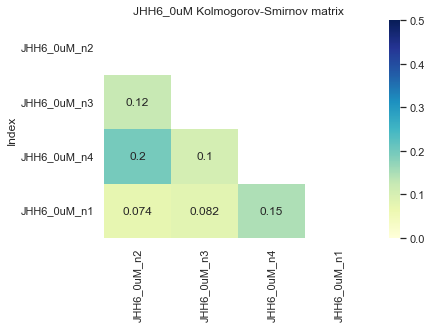

max_length:  139
dict_keys(['JHH7_1uM_n1', 'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4'])


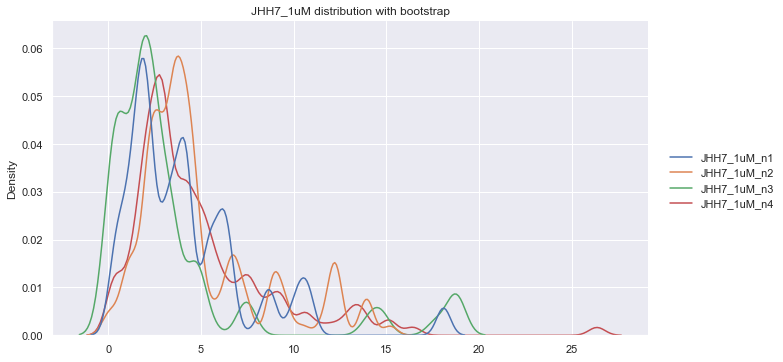

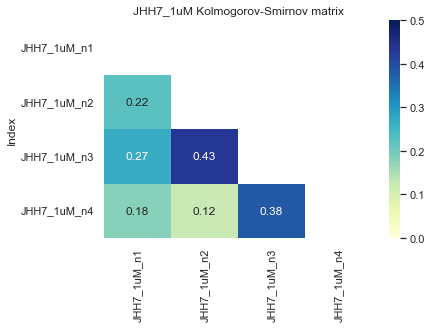

max_length:  386
dict_keys(['JHH6_1uM_n4', 'JHH6_1uM_n3', 'JHH6_1uM_n2', 'JHH6_1uM_n1'])


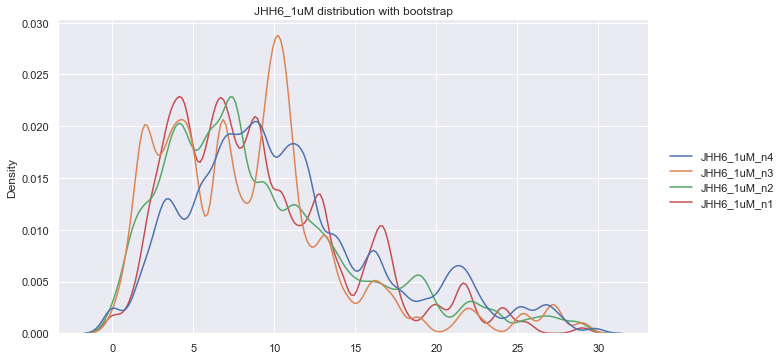

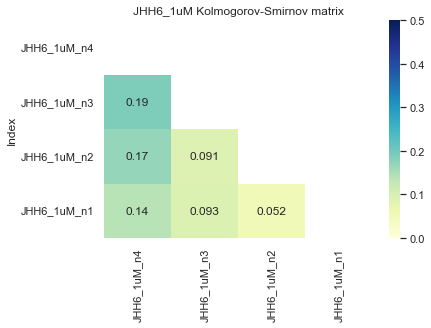

max_length:  2583
dict_keys(['Huh7_B4_Pickup', 'Huh7_A4', 'Huh7_C4', 'Huh7_D4'])


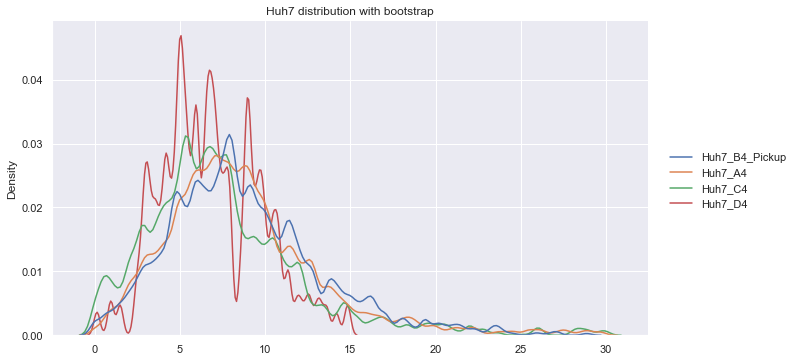

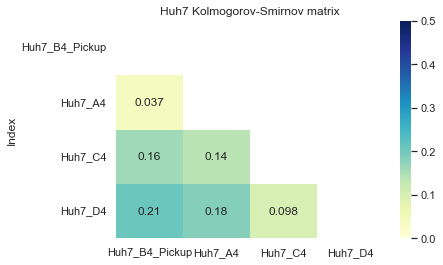

max_length:  618
dict_keys(['Kami41_A6', 'Kami41_C6', 'Kami41_D6', 'Kami41_B6_pickup'])


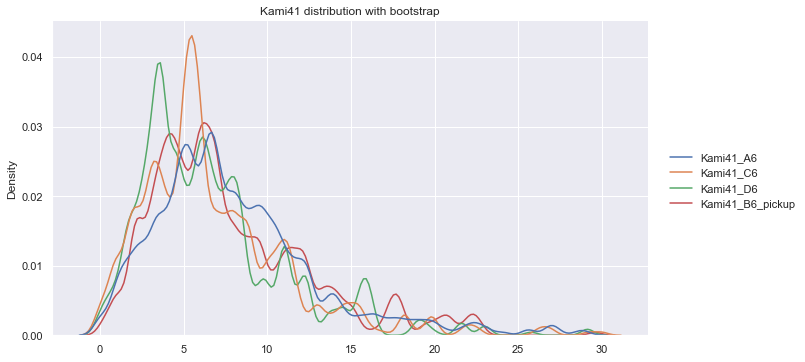

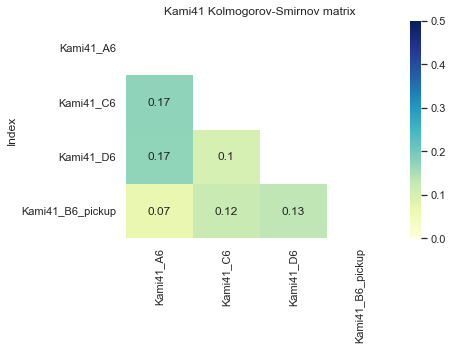

In [13]:
cell_lines = df.cell_line.unique()
for cell_line in cell_lines:
    individual_distribution_and_collect_ks(data=df, cell_line=cell_line)

In [14]:
all_ks_values

[                PRF5_B3_pickup   PRF5_A3   PRF5_C3   PRF5_D3
 Index                                                       
 PRF5_B3_pickup        0.000000  0.070873  0.056180  0.035869
 PRF5_A3               0.070873  0.000000  0.092913  0.051858
 PRF5_C3               0.056180  0.092913  0.000000  0.078652
 PRF5_D3               0.035869  0.051858  0.078652  0.000000,
                  JHH4_B2   JHH4_A2   JHH4 D2  JHH4 C2 Pickup
 Index                                                       
 JHH4_B2         0.000000  0.116071  0.172619        0.360119
 JHH4_A2         0.116071  0.000000  0.258929        0.270833
 JHH4 D2         0.172619  0.258929  0.000000        0.502976
 JHH4 C2 Pickup  0.360119  0.270833  0.502976        0.000000,
                  JHH6_A1   JHH6_B1   JHH6_D1  JHH6_C1_pickup
 Index                                                       
 JHH6_A1         0.000000  0.060543  0.083507        0.065762
 JHH6_B1         0.060543  0.000000  0.036534        0.039666
 JHH6_

max_length:  2314
dict_keys(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3'])


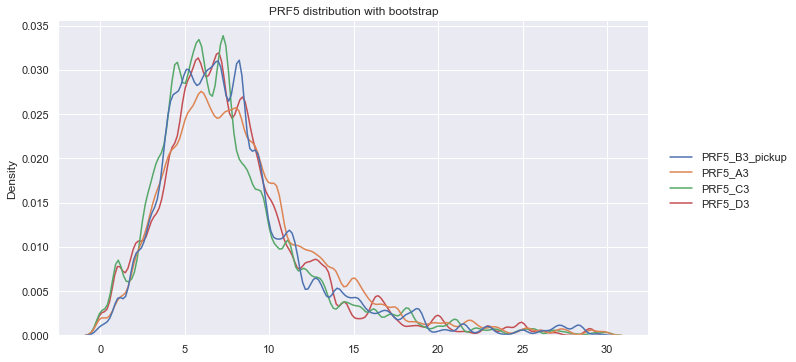

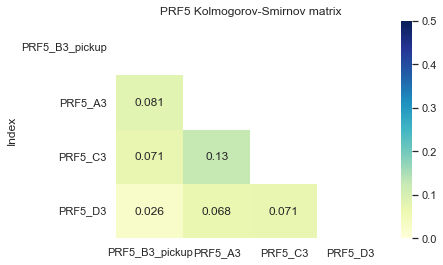

In [11]:
sns.set_theme()
individual_distribution_and_ks(data=df, cell_line='PRF5')

In [12]:
array1 = np.zeros((4, 4))

mask = np.zeros_like(array1)
mask[np.triu_indices_from(mask)] = True 
print(array1)
print()
print(mask)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
